# Clientes Restaurante - Análisis Exploratorio de Datos (EDA)

En esta actividad, exploraremos el conjunto de datos *"tips"* proporcionado por la librería Seaborn, que contiene información sobre los clientes de un restaurante que han dado propina por el servicio recibido. El objetivo principal sera llevar a cabo un análisis completo sobre las características de los clientes y su experiencia en el restaurante.

Realizaremos un análisis exploratorio de datos (EDA) para examinar cada una de las características del conjunto de datos. Este paso nos permitirá identificar y tratar valores faltantes y valores atípicos de manera adecuada. Este proceso consta de un análisis univariado, bivariado y multivariado. El análisis univariado nos ayudará a entender la distribución de cada variable individual. El análisis bivariado nos permitirá explorar las relaciones entre pares de variables, mientras que el análisis multivariado nos ayudará a detectar patrones y tendencias más complejas en el conjunto de datos. Además, evaluaremos cómo se relacionan las diferentes características entre sí.

Este análisis servirá como base para futuros informes en los que aplicaremos modelos de regresión para predecir la cantidad de propina dada por un cliente, utilizando sus características principales como variables predictoras. Estos modelos nos permitirán identificar las principales influencias sobre la cantidad de propina y realizar predicciones basadas en las características de los clientes.

# Librerías

A continuación, importaremos las librerías necesarias para el desarrollo de esta actividad. Estas librerías nos proporcionarán las herramientas y funcionalidades requeridas para realizar el análisis de datos y construir el modelo predictivo.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, mannwhitneyu, fligner, kruskal
import pingouin as pg


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de las Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","purple","#fcbf49"]
sns.set_theme( palette= palette, context= "notebook")


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Ingesta de Datos

Utilizaremos el conjunto de datos proporcionado por la librería Seaborn para llevar a cabo el análisis de datos y la posterior creación del modelo de regresión. Este conjunto de datos nos permitirá explorar las características de los clientes y predecir el valor de la propina en función de dichas características.

In [2]:
# Ingresamos los datos de la base de datos "tips" de seaborn para realizar el análisis
# ==============================================================================

df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2



Podemos observar que el conjunto de datos contiene las siguientes columnas:

- **total_bill**: Monto total de la cuenta en dólares (USD) que ha pagado el cliente antes de aplicar la propina.

- **tip**: Monto de la propina en dólares (USD) dado por el cliente.

- **sex**: Sexo del cliente, que puede ser masculino o femenino.

- **smoker**: Indica si el cliente es fumador habitual o no.

- **day**: Día de la semana en el que el cliente solicitó el servicio.

- **time**: Momento del día en que se realizó la comida, que puede ser "Lunch" (almuerzo) o "Dinner" (cena).

- **size**: Número de personas en la mesa.

Cada una de estas columnas proporciona información valiosa que utilizaremos para entender los patrones de las propinas y desarrollar nuestro modelo predictivo.

# 2. Análisis Exploratorio de Datos

Realizaremos un análisis exploratorio de datos con el objetivo de:

1. **Identificar y tratar valores faltantes y valores atípicos**: verificaremos la presencia de valores faltantes y atípicos en el conjunto de datos, y aplicaremos los métodos adecuados para gestionarlos.

2. **Análisis Univariado**: Examinaremos cada variable de forma individual para comprender su distribución y características principales.

3. **Análisis Bivariado**: Investigaremos las relaciones entre pares de variables para detectar patrones y asociaciones entre ellas.

4. **Análisis Multivariado**: Evaluaremos las interacciones entre múltiples variables simultáneamente para identificar tendencias y patrones complejos en el conjunto de datos.

5. **Análisis de Correlación**: Calcularemos las correlaciones entre variables para identificar posibles relaciones y dependencias entre ellas.

Este enfoque nos permitirá obtener una comprensión integral de nuestros datos y preparar el conjunto de datos para la creación del modelo predictivo.

## 2.1 Resumen de Nuestro Conjunto de Datos

Obtendremos un resumen de nuestro conjunto de datos para comenzar a comprenderlo en detalle. Este resumen nos proporcionará una visión general de las características del conjunto de datos, incluyendo el tipo de datos que contiene cada columna. Este paso es importante para obtener una primera impresión de la estructura y el contenido del conjunto de datos.

In [3]:
# Obtenemos información de las variables del dataset "tips"
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Podemos observar que el tipo de dato presente en cada columna es adecuado para llevar a cabo el análisis exploratorio de datos. Sin embargo, es importante tener en cuenta que, al momento de generar el modelo predictivo, será necesario realizar un mapeo numérico de las variables categóricas. Esto garantizará que dichas variables sean admitidas y tratadas correctamente por el modelo de predicción.

## 2.2 Valores Faltantes

Procederemos a comprobar si alguna variable en nuestro conjunto de datos presenta valores faltantes. Dado que nuestro conjunto de datos contiene 244 observaciones, es crucial identificar y tratar cualquier presencia considerable de valores faltantes. Si no se gestionan adecuadamente, los valores faltantes podrían reducir significativamente las dimensiones del conjunto de datos, lo que podría afectar la calidad y precisión del análisis.

In [4]:
# Comprobamos si hay presencia de valores nulos en el dataset tips
# ==============================================================================

df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Podemos observar que no hay presencia de valores faltantes en ninguna de las variables de nuestro conjunto de datos.

## 2.3 Detección de Valores Duplicados

Ahora identificaremos si existen registros duplicados en nuestro conjunto de datos. Detectar y eliminar valores duplicados es crucial, ya que la presencia de duplicados podría sesgar el análisis y afectar la precisión de los resultados, este paso nos ayudará a asegurar que cada observación en el conjunto de datos sea única y representativa.

In [5]:
# Detectamos si hay valores duplicados en el dataset
# ==============================================================================

df.duplicated().sum()

1

Se ha detectado un único registro duplicado en nuestro conjunto de datos. A continuación, procederemos a identificar cuál es el registro duplicado para tomar las acciones necesarias.

In [6]:
# Mostramos los registros duplicados en el dataset 
# ==============================================================================

df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


Dado que solo existe un registro duplicado, procederemos a eliminarlo. Esta acción beneficiará el análisis del conjunto de datos, asegurando que cada observación sea única y representativa.

In [7]:
# Eliminamos el registro duplicado en el dataset
# ==============================================================================

df.drop_duplicates(inplace=True)

Comprobamos que ya no hay presencia de observaciones duplicadas en nuestro conjunto de datos.

In [8]:
# Detectamos si hay valores duplicados en el dataset
# ==============================================================================

df.duplicated().sum()

0

Como podemos observar, ya no hay presencia de observaciones duplicadas en nuestro conjunto de datos.

## 2.4 Valores Atípicos

A continuación, procederemos a detectar valores atípicos en cada variable numérica utilizando diagramas de cajas. Este método gráfico nos permitirá identificar visualmente las observaciones que se desvían significativamente de los demás datos, lo cual es esencial para entender la distribución de las variables y tomar decisiones sobre cómo tratar estos valores atípicos.

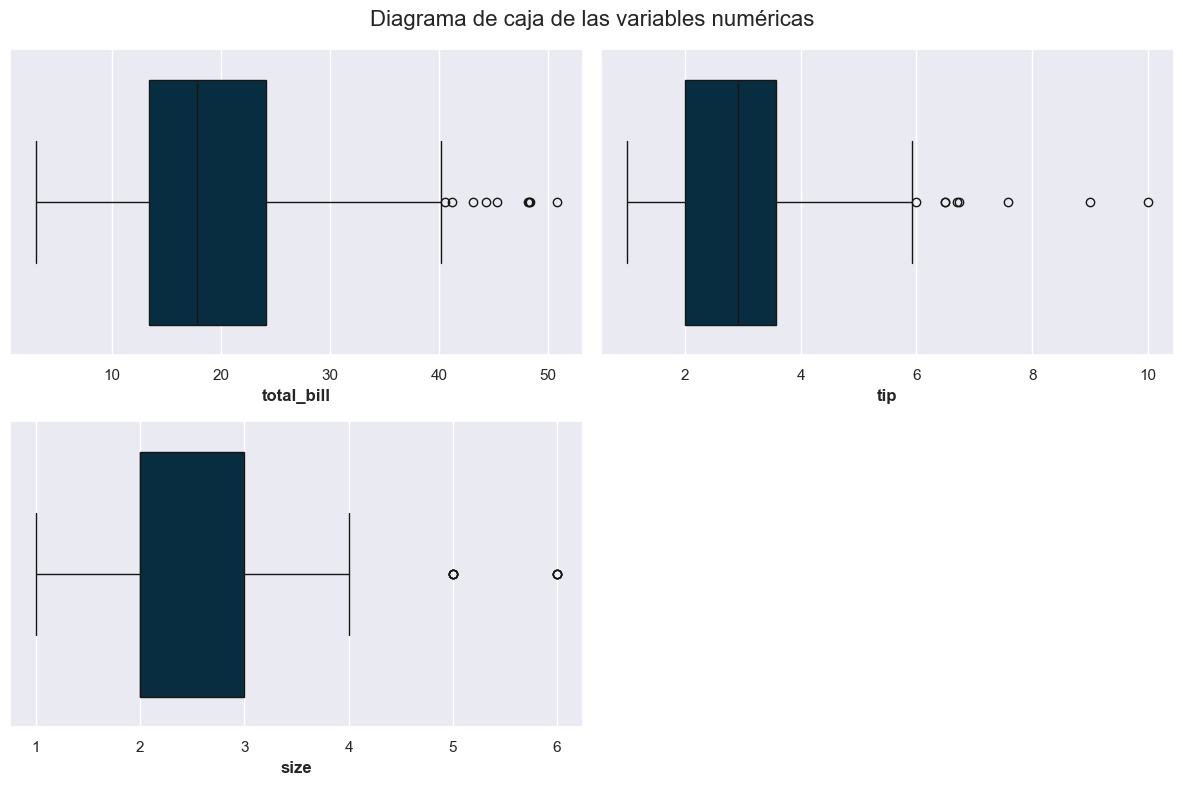

In [9]:
# Creamos la matriz de gráficos para los diagramas de caja de las variables numéricas
# ==============================================================================

fig, axes = plt.subplots(round(len(df.select_dtypes(include= [np.number]).columns)/2), 
                         2, figsize=(12, 8)
                         )

# Generamos los diagramas de caja para las variables numéricas del dataset
# ============================================================================== 

for i in range(len(df.select_dtypes(include= [np.number]).columns)):
    
    sns.boxplot(ax=axes[i//2, i%2], 
                x=df.select_dtypes(include= [np.number]).columns[i], 
                data=df, palette=palette
                )
    
    axes[i//2, i%2].set_xlabel(df.select_dtypes(include= [np.number]).columns[i], 
                               fontsize=12, 
                               weight='bold'
                               )

fig.suptitle('Diagrama de caja de las variables numéricas', fontsize=16)
fig.delaxes(axes.flatten()[len(df.select_dtypes(include= [np.number]).columns)])
fig.tight_layout()

Podemos observar la presencia de valores atípicos en cada una de las variables numéricas de nuestro conjunto de datos. Ahora procederemos a analizar en detalle cada variable numérica para comprender mejor la causa de estos valores atípicos y determinar si es necesario eliminarlos o si deben mantenerse en el análisis.

Respecto a la variable **`total_bill`**, observamos la presencia de valores atípicos, que se ubican por encima de 40. Esto sugiere que, en general, los clientes suelen gastar menos de 40 en el restaurante. Sería útil analizar las características de los clientes que realizan compras superiores a 40 para entender mejor estos gastos atípicos.

In [10]:
# Observamos los clientes que realizan compras superiores a $40
# ==============================================================================

df[df['total_bill'] > 40]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


Podemos observar las siguientes características de los clientes que gastaron más de $40 en el restaurante:

- Se registraron 10 personas que realizaron una compra superior a 40 dólares. De estas, 8 eran hombres y 2 eran mujeres. Es importante considerar que, aunque hay más hombres que mujeres entre los que gastaron más de 40 dólares, la proporción de hombres y mujeres que visitaron el restaurante puede no haber sido equilibrada. Por lo tanto, no se puede concluir de manera definitiva que los hombres gastan más que las mujeres sin analizar la proporción de género en el total de visitantes.

- La distribución entre fumadores y no fumadores es equilibrada, con 6 fumadores y 4 no fumadores entre los que gastaron más de 40. Esto sugiere que el hecho de ser fumador o no puede no tener un impacto significativo en el gasto superior a 40 dólares.

- El día de la semana no muestra una influencia clara en los gastos superiores a 40. Sin embargo, se observa que 8 de las 10 compras mayores a 40 dólares se realizaron durante la cena. Esto sugiere que los clientes podrían gastar más durante la cena que durante el almuerzo, al menos en el caso de aquellos que gastan más de 40 dólares.

- Todos los clientes que gastaron más de 40 dólares estaban en mesas con más de 3 personas. Esto indica que el tamaño del grupo puede influir considerablemente en el gasto total, ya que una mayor cantidad de personas generalmente resulta en un mayor gasto.

Dado que los valores atípicos en la variable **`total_bill`** son consistentes con las características observadas y no parecen ser errores en los datos, los mantendremos en el análisis.

Ahora, en relación con la columna **`tip`**, observamos que los valores atípicos están situados en montos de 6 dólares o más. A continuación, analizaremos las características de las personas que han dado una propina de 6 o más para entender mejor estos valores atípicos.

In [11]:
# Observamos los clientes que dejan propinas superiores a $6
# ==============================================================================

df[df['tip'] >= 6]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3



De los clientes que han dado una propina mayor o igual a 6 dólares, podemos observar lo siguiente:

- Ocho personas han dado una propina de 6 dólares o más.

- La cantidad de propina parece estar influenciada por el total pagado, ya que los montos elevados en propinas suelen correlacionarse con cuentas más altas.

- De estas 8 personas, 7 eran hombres y solo 1 era mujer. Además, 7 de las propinas mayores o iguales a 6 dólares correspondieron a cenas, mientras que solo 1 correspondió a un almuerzo.

- En todos los casos, la cantidad de personas en la mesa era de 3 o más.

De acuerdo con estas características, las observaciones parecen válidas, ya que no presentan irregularidades evidentes que sugieran errores en la medición. Optamos por conservar estas observaciones en el análisis.

Finalmente, con respecto a la variable **`size`**, observamos que se consideran atípicos los grupos de más de 4 personas en el restaurante. Esto podría deberse a diversos factores, como el público objetivo del restaurante, el tipo de comida ofrecida, la disposición de las mesas, la ubicación del restaurante, entre otros. Vamos a analizar las características principales de los grupos de más de 4 personas que visitan el restaurante:

In [12]:
# Observamos el numero de personas en la mesa que superan las 4 personas
# ==============================================================================

df[df['size'] > 4]

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


Las observaciones con un número de personas en la mesa que supera las 4 tienen las siguientes características:

- Se registran nueve observaciones en las que el número de personas en la mesa es mayor a 4.

- Aunque la cantidad gastada suele ser elevada, hay un caso en el que el gasto es de alrededor de 20 dólares, lo que contrasta con las demás observaciones que muestran montos más altos.

- De estas observaciones, 4 corresponden al género masculino y 3 al género femenino.

- Predominan las personas que no son fumadoras habituales, con 7 observaciones frente a 2 para los fumadores habituales. En cuanto a los días, hay un equilibrio relativo con 4 observaciones correspondientes al jueves, 4 al domingo y solo 1 al sábado.

- La distribución entre almuerzo y cena está equilibrada, con 4 observaciones correspondientes al almuerzo y 5 a la cena.

El análisis de los valores atípicos indica que las observaciones son válidas y no muestran señales de errores en la medición. Por lo tanto, no es necesario eliminar estos valores atípicos y podemos continuar con el análisis exploratorio de datos.

## 2.5 Análisis Univariado

A continuación, realizaremos un análisis univariado de cada una de las columnas de nuestro conjunto de datos. Este análisis tiene como objetivo comprender la distribución de los datos, examinar sus estadísticas descriptivas y detectar posibles patrones. Para ello, utilizaremos resúmenes estadísticos que nos permitirán calcular los estadísticos más importantes de cada variable, complementados con representaciones gráficas como histogramas. 

Comenzaremos con las variables cuantitativas y, posteriormente, analizaremos las variables categóricas.

- **Análisis Univariado de las Variables Cuantitativas**

In [13]:
# Calculamos los estadísticos descriptivos de las variables numéricas del dataset
# ==============================================================================

df.describe(include= [np.number])

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


De los estadísticos descriptivos hallados sobre las variables cuantitativas del conjunto de datos, podemos observar lo siguiente:

- El mínimo que han gastado en el restaurante ha sido de 3.07 dólares, el promedio de gasto de los clientes ha sido de 19.81 dólares, y el máximo ha sido de 50.81 dólares. De acuerdo con los cuantiles, podemos observar que el 50% de los clientes han gastado en un rango de 13.38 y 24.17 dólares.

- De acuerdo con la variable `tip`, la propina más baja que han dado ha sido de 1 dólar, lo que sugiere que se han tomado los datos solo de personas que han dado una propina al restaurante. Además, el promedio se sitúa en 3 dólares, y la propina más alta que han dado ha sido de 10 dólares. Algo que cabe resaltar es que, cuando realizamos la detección y análisis de valores atípicos, pudimos observar que, de todas las observaciones del conjunto de datos, solo hay una que ha realizado la propina de 10 dólares, que, curiosamente, es el mismo cliente que ha realizado el mayor gasto en el restaurante. Otra información adicional que podemos destacar es que al menos el 75% han dado una cantidad igual o menor que 3.57 dólares de propina.

- Con respecto a la variable `size`, podemos observar que la cantidad de personas en una mesa se sitúa en 2.57 personas. Además, también podemos resaltar que al menos el 75% de los clientes han ido en grupos de 3 o menos personas. El máximo de personas por mesa registradas en el conjunto de datos ha sido de 6.

Ahora vamos a realizar las representaciones gráficas que nos permitan comprender cómo están distribuidas las variables cuantitativas de nuestro conjunto de datos.

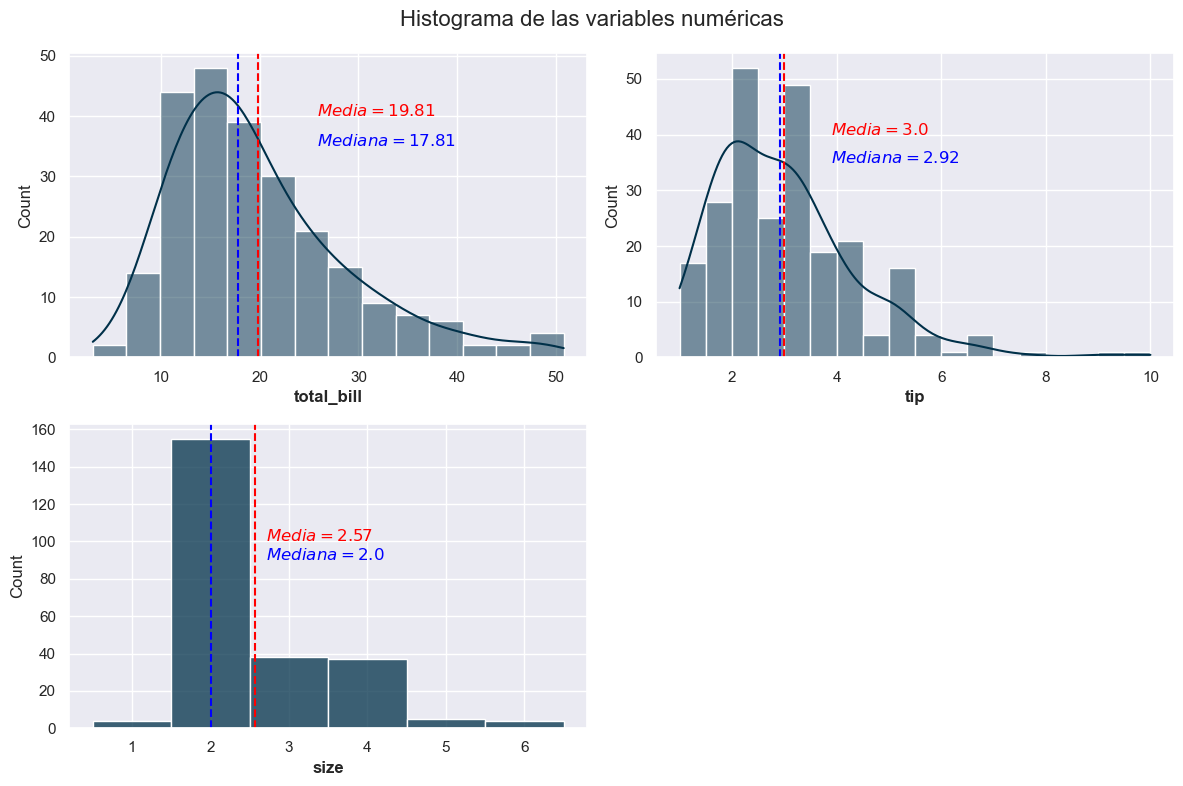

In [14]:
# Creamos una matriz de gráficos para los histogramas de las variables numéricas
# ==============================================================================
fig, axes = plt.subplots(round(len(df.select_dtypes(include= [np.number]).columns)/2), 
                         ncols= 2, 
                         figsize=(12, 8)
                         )


# Generamos los histogramas para las variables numéricas del dataset
# ==============================================================================

for i in range(len(df.select_dtypes(include= [np.number]).columns)):
    
    if i == 2:
        
        sns.histplot(ax=axes[i//2, i%2], 
                     x=df.select_dtypes(include= [np.number]).columns[i], 
                     data=df, 
                     palette= palette, 
                     discrete= True
                     )
        
        axes[i//2, i%2].text(x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.05, 
                             y=100, 
                             s= f"$Media = {round(df.select_dtypes(include= [np.number]).iloc[:, i].mean(), 2)}$", 
                             color='red', 
                             weight='bold'
                             )
        
        axes[i//2, i%2].text(x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.05,
                             y=90, 
                             s= f"$Mediana = {round(df.select_dtypes(include= [np.number]).iloc[:, i].median(), 2)}$", 
                             color='blue', 
                             weight='bold'
                             )

    else:
        
        sns.histplot(ax=axes[i//2, i%2], 
                     x=df.select_dtypes(include= [np.number]).columns[i], 
                     data=df, 
                     kde=True, 
                     palette=palette
                     )
        
        axes[i//2, i%2].text(x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.3, 
                             y=40, 
                             s= f"$Media = {round(df.select_dtypes(include= [np.number]).iloc[:, i].mean(), 2)}$", 
                             color='red', 
                             weight='bold'
                             )
        
        axes[i//2, i%2].text(x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.3, 
                             y=35, 
                             s= f"$Mediana = {round(df.select_dtypes(include= [np.number]).iloc[:, i].median(), 2)}$", 
                             color='blue', 
                             weight='bold'
                             )

    axes[i//2, i%2].axvline(df.select_dtypes(include= [np.number]).iloc[:, i].mean(), 
                            color='red', 
                            linestyle='--'
                            )
    
    axes[i//2, i%2].axvline(df.select_dtypes(include= [np.number]).iloc[:, i].median(),
                            color='blue', 
                            linestyle='--'
                            )

    axes[i//2, i%2].set_xlabel(df.select_dtypes(include= [np.number]).columns[i], 
                               fontsize=12, 
                               weight='bold'
                               )
    
fig.delaxes(axes.flatten()[len(df.select_dtypes(include= [np.number]).columns)])

fig.suptitle('Histograma de las variables numéricas', 
             fontsize=16
             )
fig.tight_layout()

De las representaciones de las variables cuantitativas generadas por medio de histogramas podemos observar lo siguiente:

- La distribución de la variable `total_bill` tiene una forma que se asemeja a la distribución normal, sin embargo, presenta una asimetría positiva, es decir, la cola de la distribución se extiende hacia la derecha. Podemos observar que la concentración de datos se sitúa en torno a los 15 dólares aproximadamente; conforme se aleja de este valor, la concentración de datos disminuye.

- Con respecto a la distribución de la variable `tip`, podemos observar que la mayor cantidad de clientes ha dado una propina cercana a los 2 dólares; de la distribución, podemos resaltar que muy pocas personas han dado una propina mayor a 6 dólares.

- La distribución de la variable `size` nos permite observar que la mayor cantidad de personas va en grupos de solamente dos personas; luego se sitúan grupos de 3 y 4 personas que tienen cantidades similares. Por último, muy pocas personas van ya sea solas o en grupos mayores a 4 personas.

Ahora que ya hemos realizado el análisis univariado sobre las variables cuantitativas, vamos a realizarlo sobre las variables categóricas.

In [15]:
# Calculamos los estadísticos descriptivos de las variables categóricas del dataset
# ==============================================================================

df.describe(include= 'category', )

,sex,smoker,day,time
count,243,243,243,243
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Ahora procederemos a realizar las representaciones gráficas de las variables categóricas de nuestro conjunto de datos.

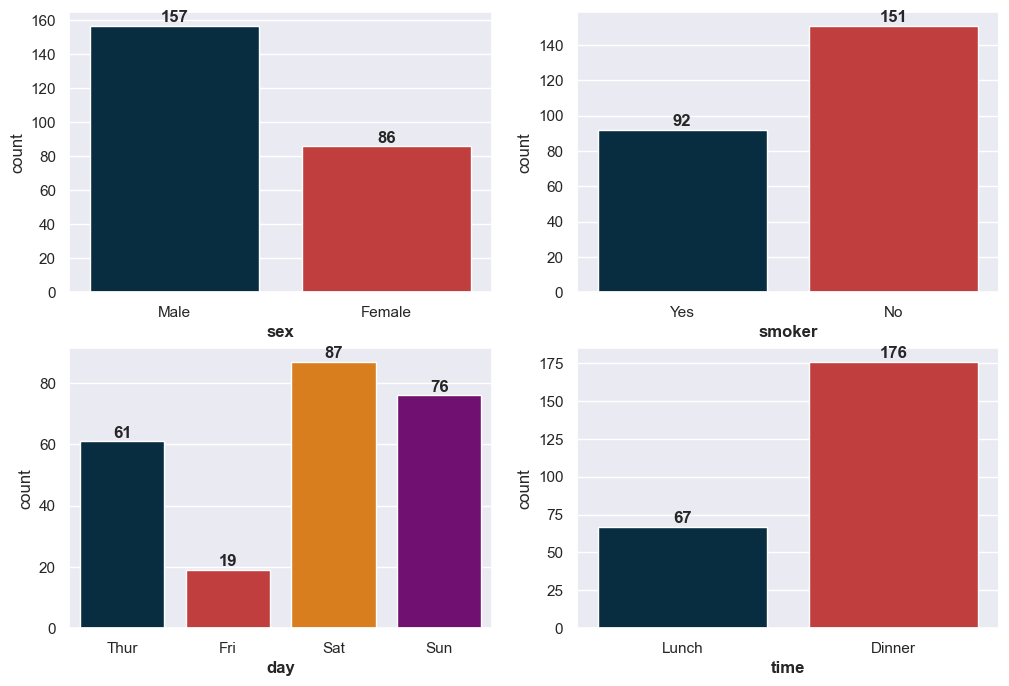

In [16]:
# Generamos la matriz de gráficos para los diagramas de barras de las variables categóricas
# ==============================================================================

fig, axes = plt.subplots(round(len(df.select_dtypes(include='category').columns)/2), 2, figsize=(12, 8))


# Generamos las graficas de barras para las variables categóricas del dataset
# ==============================================================================

for i in range(len(df.select_dtypes(include='category').columns)):
    
    ax = sns.countplot(ax=axes[i//2, i%2], 
                       x=df.select_dtypes(include='category').columns[i], 
                       data=df, 
                       palette=palette
                       )
    
    axes[i//2, i%2].set_xlabel(df.select_dtypes(include='category').columns[i], 
                               fontsize=12, 
                               weight='bold'
                               )
    
    # Añadimos los valores en las barras de las gráficas
    # ==============================================================================
    
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 6), 
                    textcoords='offset points', 
                    fontsize=12, 
                    weight='bold'
                    )

De los estadísticos descriptivos de las variables categóricas de nuestro conjunto de datos podemos observar:

- `sex`: Hay una ligera predominancia de la cantidad de hombres con respecto a la de mujeres, puesto que de las 243 observaciones, hay 157 hombres, dándonos una proporción del 64% aproximadamente.

- `smoker`: Al igual que con el género, existe una ligera predominancia de las personas que no son fumadoras habituales, con una cantidad de clientes de 151, lo que supone el 62% aproximadamente.

- `day`: Podemos observar que hay solo 4 días en el conjunto de datos, y la mayor frecuencia de observaciones se sitúa en el día sábado con una cantidad de 87 observaciones. En segundo lugar se encuentra el domingo con 76 observaciones, en tercer lugar el jueves con 61 observaciones, y finalmente, el viernes con tan solo 19 observaciones.

- `time`: De acuerdo a sus estadísticos descriptivos, podemos observar que la mayor cantidad de personas registradas cenan, con una cantidad de 176 personas; esto supone que el 72% de las personas del conjunto de datos fueron a cenar al restaurante.

## 2.6 Análisis Bivariado

Ahora procederemos a realizar un análisis bivariado ue nos permita explorar tendencias y patrones al comparar dos variables. Comenzaremos comparando todas las variables numéricas con respecto a la variable dependiente "tip", correspondiente a la propina.

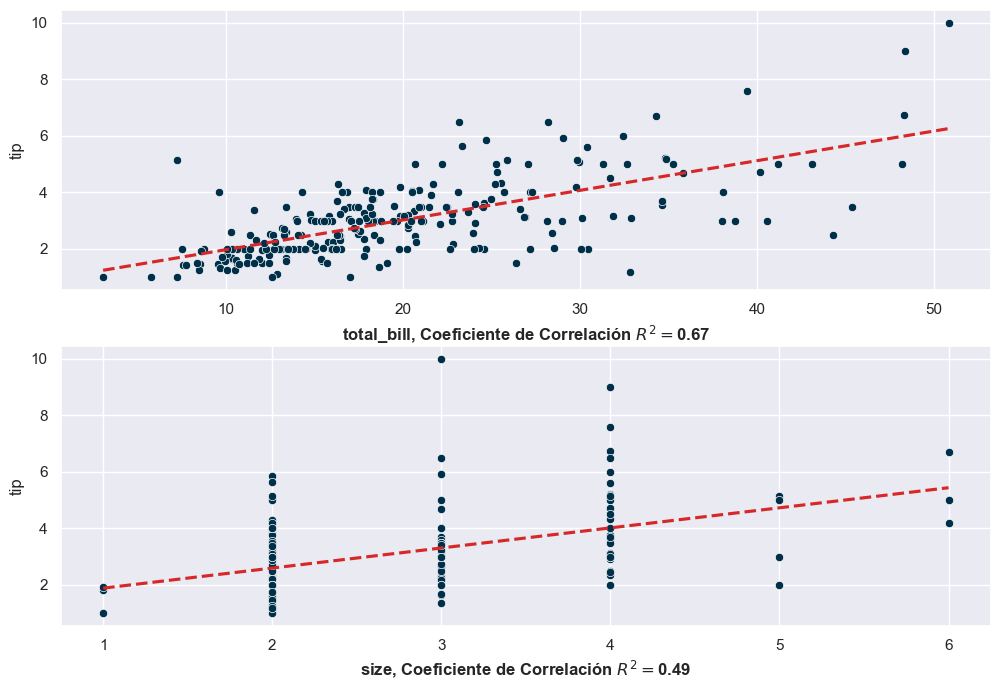

In [17]:
# Generamos la matriz de gráficas de dispersión para las variables numéricas
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Creamos las graficas de dispersión para las variables numéricas
# ==============================================================================

for enum, i in enumerate(['total_bill', 'size']):
    
    sns.scatterplot(x=df[i], 
                    y='tip', 
                    data=df, 
                    ax=axes[enum],
                    palette=palette
                    )
    
    sns.regplot(x=df[i], 
                y='tip', 
                data=df, 
                ax=axes[enum], 
                color=palette[1], 
                scatter=False, 
                ci= None, 
                line_kws={'linestyle':'--'}
                )
    
    axes[enum].set_xlabel(f'{i}, Coeficiente de Correlación $R^2 = ${pearsonr(df['tip'], df[i])[0]:.2f}', 
                          fontsize=12, 
                          weight='bold'
                          )
    

De acuerdo con el análisis bivariado de las variables cuantitativas de nuestro conjunto de datos, podemos observar lo siguiente:

- Existe una **relación positiva moderada** entre el gasto de los clientes en el restaurante y la propina que dan. El coeficiente de correlación de Pearson es de 0.67, lo que indica que el 67% de la variabilidad en el valor de las propinas puede ser explicado por el gasto de los clientes. Esto sugiere que un mayor gasto en el restaurante está relacionado con una propina mayor.

- En cuanto a la variable **`size`**, también presenta una **relación positiva moderada** con la variable **`tip`**. El coeficiente de correlación de Pearson es de 0.49, lo que indica que la cantidad de personas en la mesa es capaz de explicar el 24% de la variabilidad en las propinas, esto sugiere que mesas con mayor cantidad de personas tienden a dar propinas mayores.

Una vez realizado el análisis bivariado de las variables cuantitativas en relación con la variable dependiente **`tip`**, procederemos a analizar las variables categóricas.

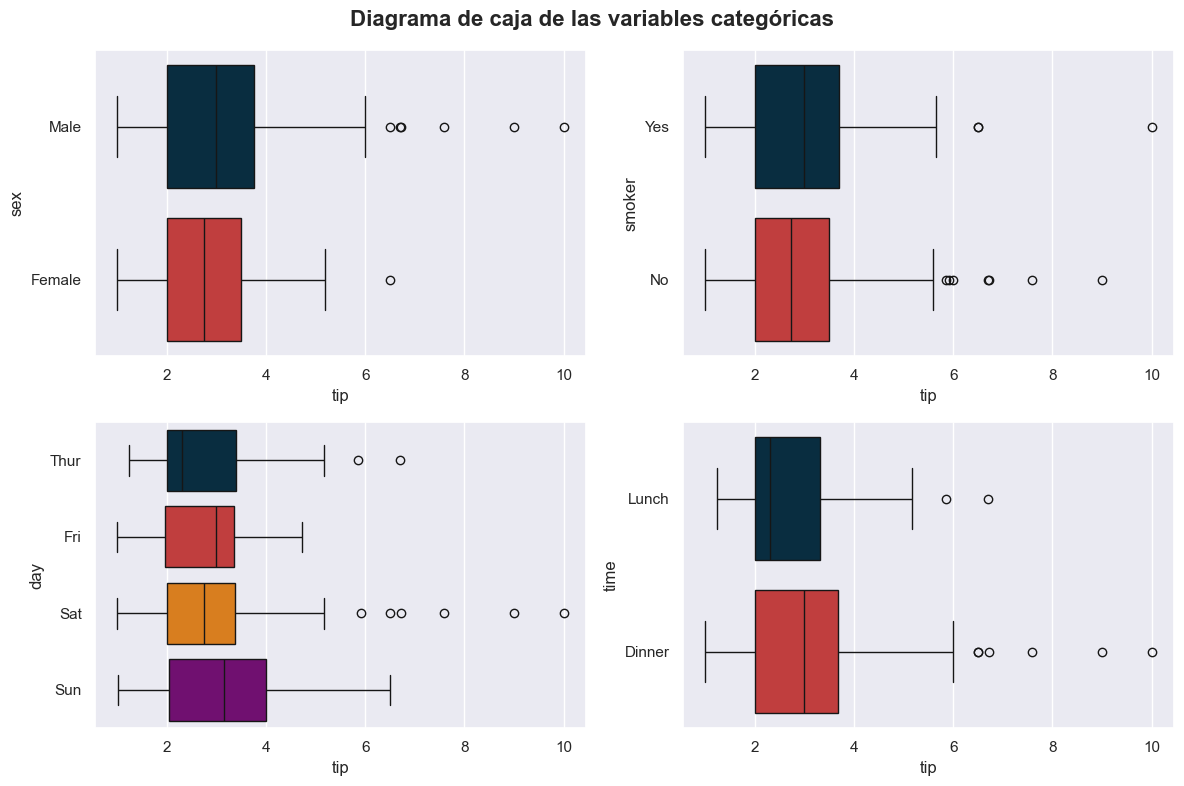

In [18]:
# Creamos la matriz de gráficos para los diagramas de caja de las variables categóricas
# ==============================================================================

fig, axes = plt.subplots(round(len(df.select_dtypes(include='category').columns)/2), 2, figsize=(12, 8))

for i in range(len(df.select_dtypes(include='category').columns)):
    
    sns.boxplot(ax=axes[i//2, i%2], 
                y=df.select_dtypes(include='category').columns[i], 
                x='tip', 
                data=df, 
                palette=palette
                )
fig.suptitle('Diagrama de caja de las variables categóricas', fontsize=16, weight= 'bold')
fig.tight_layout()

De acuerdo con el análisis bivariado realizado sobre las variables categóricas, observamos que las diferencias entre los grupos son relativamente pequeñas. Sin embargo, es crucial identificar cuáles de estas diferencias son estadísticamente significativas y cuáles podrían ser una variación aleatoria de los datos. Para esto, podemos utilizar pruebas de hipótesis, que nos permiten determinar qué diferencias entre los grupos son significativas y cuáles no.

El **T-test** es una prueba que compara si las medias de dos poblaciones con distribuciones normales son significativamente diferentes y no se deben a la aleatoriedad de los datos. Este test asume que los datos tienen una distribución normal, pero en la práctica es bastante robusto y puede ser utilizado con distribuciones no normales si el tamaño de la muestra es mayor a 30 (según el teorema del límite central). 

Procederemos a verificar si las variables con dos categorías siguen una distribución normal utilizando la prueba de hipótesis de normalidad **Shapiro-Wilk**, disponible en la librería __pingouin__.

In [19]:
# Comprobamos la normalidad de la variable tip en función de la variable sex
# ==============================================================================

pg.normality(data= df, dv= 'tip', group= 'sex', method= 'shapiro', alpha= 0.05)

,W,pval,normal
sex,,,
Female,0.958444,7.407776e-03,False
Male,0.875869,3.708483e-10,False


In [20]:
# Comprobamos la normalidad de la variable tip en función de la variable smoker
# ==============================================================================

pg.normality(data= df, dv= 'tip', group= 'smoker', method= 'shapiro', alpha= 0.05)

,W,pval,normal
smoker,,,
No,0.904001,2.058758e-08,False
Yes,0.880900,4.932768e-07,False


In [21]:
# Comprobamos la normalidad de la variable tip en función de la variable time
# ==============================================================================

pg.normality(data= df, dv= 'tip', group= 'time', method= 'shapiro', alpha= 0.05)

,W,pval,normal
time,,,
Dinner,0.900928,1.784235e-09,False
Lunch,0.872767,5.732054e-06,False


Como podemos observar, ninguna de las variables categóricas con dos categorías sigue una distribución normal. En este caso, realizaremos la prueba de hipótesis no paramétrica **Mann-Whitney U**, que se utiliza para comparar dos muestras independientes y determinar si provienen de la misma distribución. Las hipótesis para esta prueba son:

- **Hipótesis Nula (H₀):** No hay diferencia en la distribución de los rangos entre las dos muestras independientes. Esto implica que la probabilidad de que una observación de la población X tenga un valor mayor que una observación de la población Y es igual a la probabilidad de que una observación de Y sea mayor que una observación de X.

- **Hipótesis Alternativa (Hₐ):** Existe una diferencia en la distribución de los rangos entre las dos muestras.

Además, utilizaremos un umbral de significancia de 0.05. Si un valor p se encuentra por debajo de este umbral, tendremos suficiente evidencia para rechazar la hipótesis nula en favor de la hipótesis alternativa. Esta prueba se aplicará a las variables categóricas con dos categorías: `sex`, `smoker` y `time`.

In [22]:
# Realizamos la prueba de hipotesis Mann-Whitney para las variables categóricas
# ==============================================================================

for i in df.select_dtypes(include='category').drop(columns= 'day').columns:
    
    u_statistic, p_value = mannwhitneyu(df['tip'][df[i] == df[i].unique()[0]],
                                        df['tip'][df[i] == df[i].unique()[1]], 
                                        alternative= 'two-sided'
                                        )
    
    print(f'El test de Mann-Whitney para la variable {i} con respecto a la propina es:')
    print(f"U-Statistic: {u_statistic}, p-value: {p_value}\n")

El test de Mann-Whitney para la variable sex con respecto a la propina es:
U-Statistic: 6330.5, p-value: 0.4219836521453346

El test de Mann-Whitney para la variable smoker con respecto a la propina es:
U-Statistic: 6768.0, p-value: 0.7379576525013619

El test de Mann-Whitney para la variable time con respecto a la propina es:
U-Statistic: 6926.5, p-value: 0.03510247758784864



Como podemos observar, no existe una diferencia significativa entre los promedios del género masculino y femenino, lo que sugiere que la diferencia observada es producto de la variación aleatoria de los datos. De manera similar, podemos observar que ser fumador o no, no influye significativamente en la cantidad de propina que una persona deja. En contraste, la variable `time` muestra un ligero impacto en el valor de la propina, sugiriendo que durante la cena hay una leve tendencia a recibir propinas mayores en comparación con el almuerzo en el restaurante.

Ahora, vamos a determinar el tamaño del efecto de la variable `time` respecto al aumento en la cantidad de propina recibida. El tamaño del efecto lo podemos medir utilizando **Cohen's d**. Para que esta medida sea válida, las poblaciones que estamos comparando deben tener varianzas similares. Esto lo podemos verificar a través del test de **Fligner-Killeen**, cuyas hipótesis son:

- **Hipótesis Nula (H₀):** La varianza es constante entre los grupos o condiciones, lo que indica homocedasticidad, es decir, todas las muestras tienen la misma varianza poblacional.

- **Hipótesis Alternativa (Hₐ):** Al menos una de las varianzas de las muestras es diferente, lo que indica heterocedasticidad, es decir, al menos dos de las muestras tienen varianzas poblacionales distintas.

In [23]:
# Realizamos la prueba de hipótesis Fligner-Killeen
# ==============================================================================

estadistico, pvalue = fligner(df[df['time'] == 'Lunch']['tip'], 
                              df[df['time'] == 'Dinner']['tip'], 
                              center= 'mean'
                              )

if pvalue < 0.05:
    print(f'La variable time no tiene varianzas iguales con un pvalue de {pvalue}')
else:
    print(f'La variable time tiene varianzas iguales con un pvalue de {pvalue}')

La variable time tiene varianzas iguales con un pvalue de 0.7241237106551917


Una vez comprobado que los grupos presentan varianzas similares, podemos calcular la medida de **Cohen's d** para determinar el tamaño del efecto.

In [24]:
# Hallamos el tamaño de efecto
# ==============================================================================

grupo1 = df[df['time'] == 'Dinner']['tip']
grupo2 = df[df['time'] == 'Lunch']['tip']
media1 = np.mean(grupo1)
media2 = np.mean(grupo2)
std1 = np.std(grupo1, ddof=1)
std2 = np.std(grupo2, ddof=1)
n1, n2 = len(grupo1), len(grupo2)
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
cohen_d = (media1 - media2) / pooled_std

print(f"El tamaño de efecto Cohen's d para la variable time es: {cohen_d}")

El tamaño de efecto Cohen's d para la variable time es: 0.26389780655197725


El tamaño de efecto de la variable `time` es pequeño, lo que indica que hay un ligero aumento en el valor de la propina cuando es una cena, en comparación con cuando es un almuerzo en el restaurante.

Ahora, con respecto a las variable `day` que presenta varias categorías, podemos utilizar el test de Kruskal-Wallis, que se emplea para determinar si hay diferencias significativas entre tres o más grupos independientes cuando los datos no cumplen con los supuestos de normalidad. Las hipótesis nula y alternativa de este test son:

- **Hipótesis nula $(H_0)$**: Las medianas de todos los grupos son iguales. No hay diferencias significativas entre las medianas de los grupos que se están comparando.

- **Hipótesis alternativa $(H_a)$**: Al menos una de las medianas de los grupos es diferente. Existen diferencias significativas entre las medianas de al menos dos de los grupos que se están comparando.

In [25]:
# Calculamos la prueba de hipótesis kruskal para la variable time
# ==============================================================================

estadistico, pvalue = stats.kruskal(df[df['time'] == 'Lunch']['tip'], 
                                    df[df['time'] == 'Dinner']['tip']
                                    )

if p_value < 0.05:
    print(f'La variable time tiene una diferencia significativa con un pvalue de {pvalue}')
else:
    print(f'La variable time no tiene una diferencia significativa con un pvalue de {pvalue}')

La variable time tiene una diferencia significativa con un pvalue de 0.035013939183031785


Como podemos observar, sí existe una diferencia estadísticamente significativa entre las medianas de uno o varios grupos. Por lo tanto, vamos a calcular si existe una diferencia estadísticamente significativa entre el día jueves y el domingo con respecto a las propinas dadas por los clientes.

In [26]:
# Calculamos si existe una diferencia estadísticamente significativa
# =================================================================================

stats.mannwhitneyu(df[df['day'] == 'Thur']['tip'], df[df['day'] == 'Sun']['tip'], alternative= 'two-sided')

MannwhitneyuResult(statistic=1741.5, pvalue=0.012376482084298384)

Si existe una diferencia estadísticamente significativa en el valor de las propinas entre el día jueves y el día domingo, vamos a calcular el tamaño del efecto mediante la medida de Cohen's d.

In [27]:
# Hallamos el tamaño de efecto
# ==============================================================================

grupo1 = df[df['day'] == 'Sun']['tip']
grupo2 = df[df['day'] == 'Thur']['tip']
media1 = np.mean(grupo1)
media2 = np.mean(grupo2)
std1 = np.std(grupo1, ddof=1)
std2 = np.std(grupo2, ddof=1)
n1, n2 = len(grupo1), len(grupo2)
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
cohen_d = (media1 - media2) / pooled_std

print(f"El tamaño de efecto Cohen's d para la variable time es: {cohen_d}")

El tamaño de efecto Cohen's d para la variable time es: 0.37985070013576805


El tamaño de efecto es pequeño, lo que indica que hay un ligero aumento en el valor de la propina cuando es domingo en comparación con el día jueves.

## 2.7 Análisis Multivariado  
A continuación, realizaremos el análisis multivariado con el objetivo de detectar patrones y tendencias que pueden estar ocultas cuando analizamos solo una variable a la vez. Esto nos permitirá comprender relaciones más complejas que podrían estar presentes en nuestro conjunto de datos. Esta sección la podemos enfocar mediante preguntas que pueden ser respondidas a través de representaciones gráficas.

- **¿Hay alguna diferencia en la cantidad de hombres y mujeres en función del día y la cantidad de personas por mesa?**

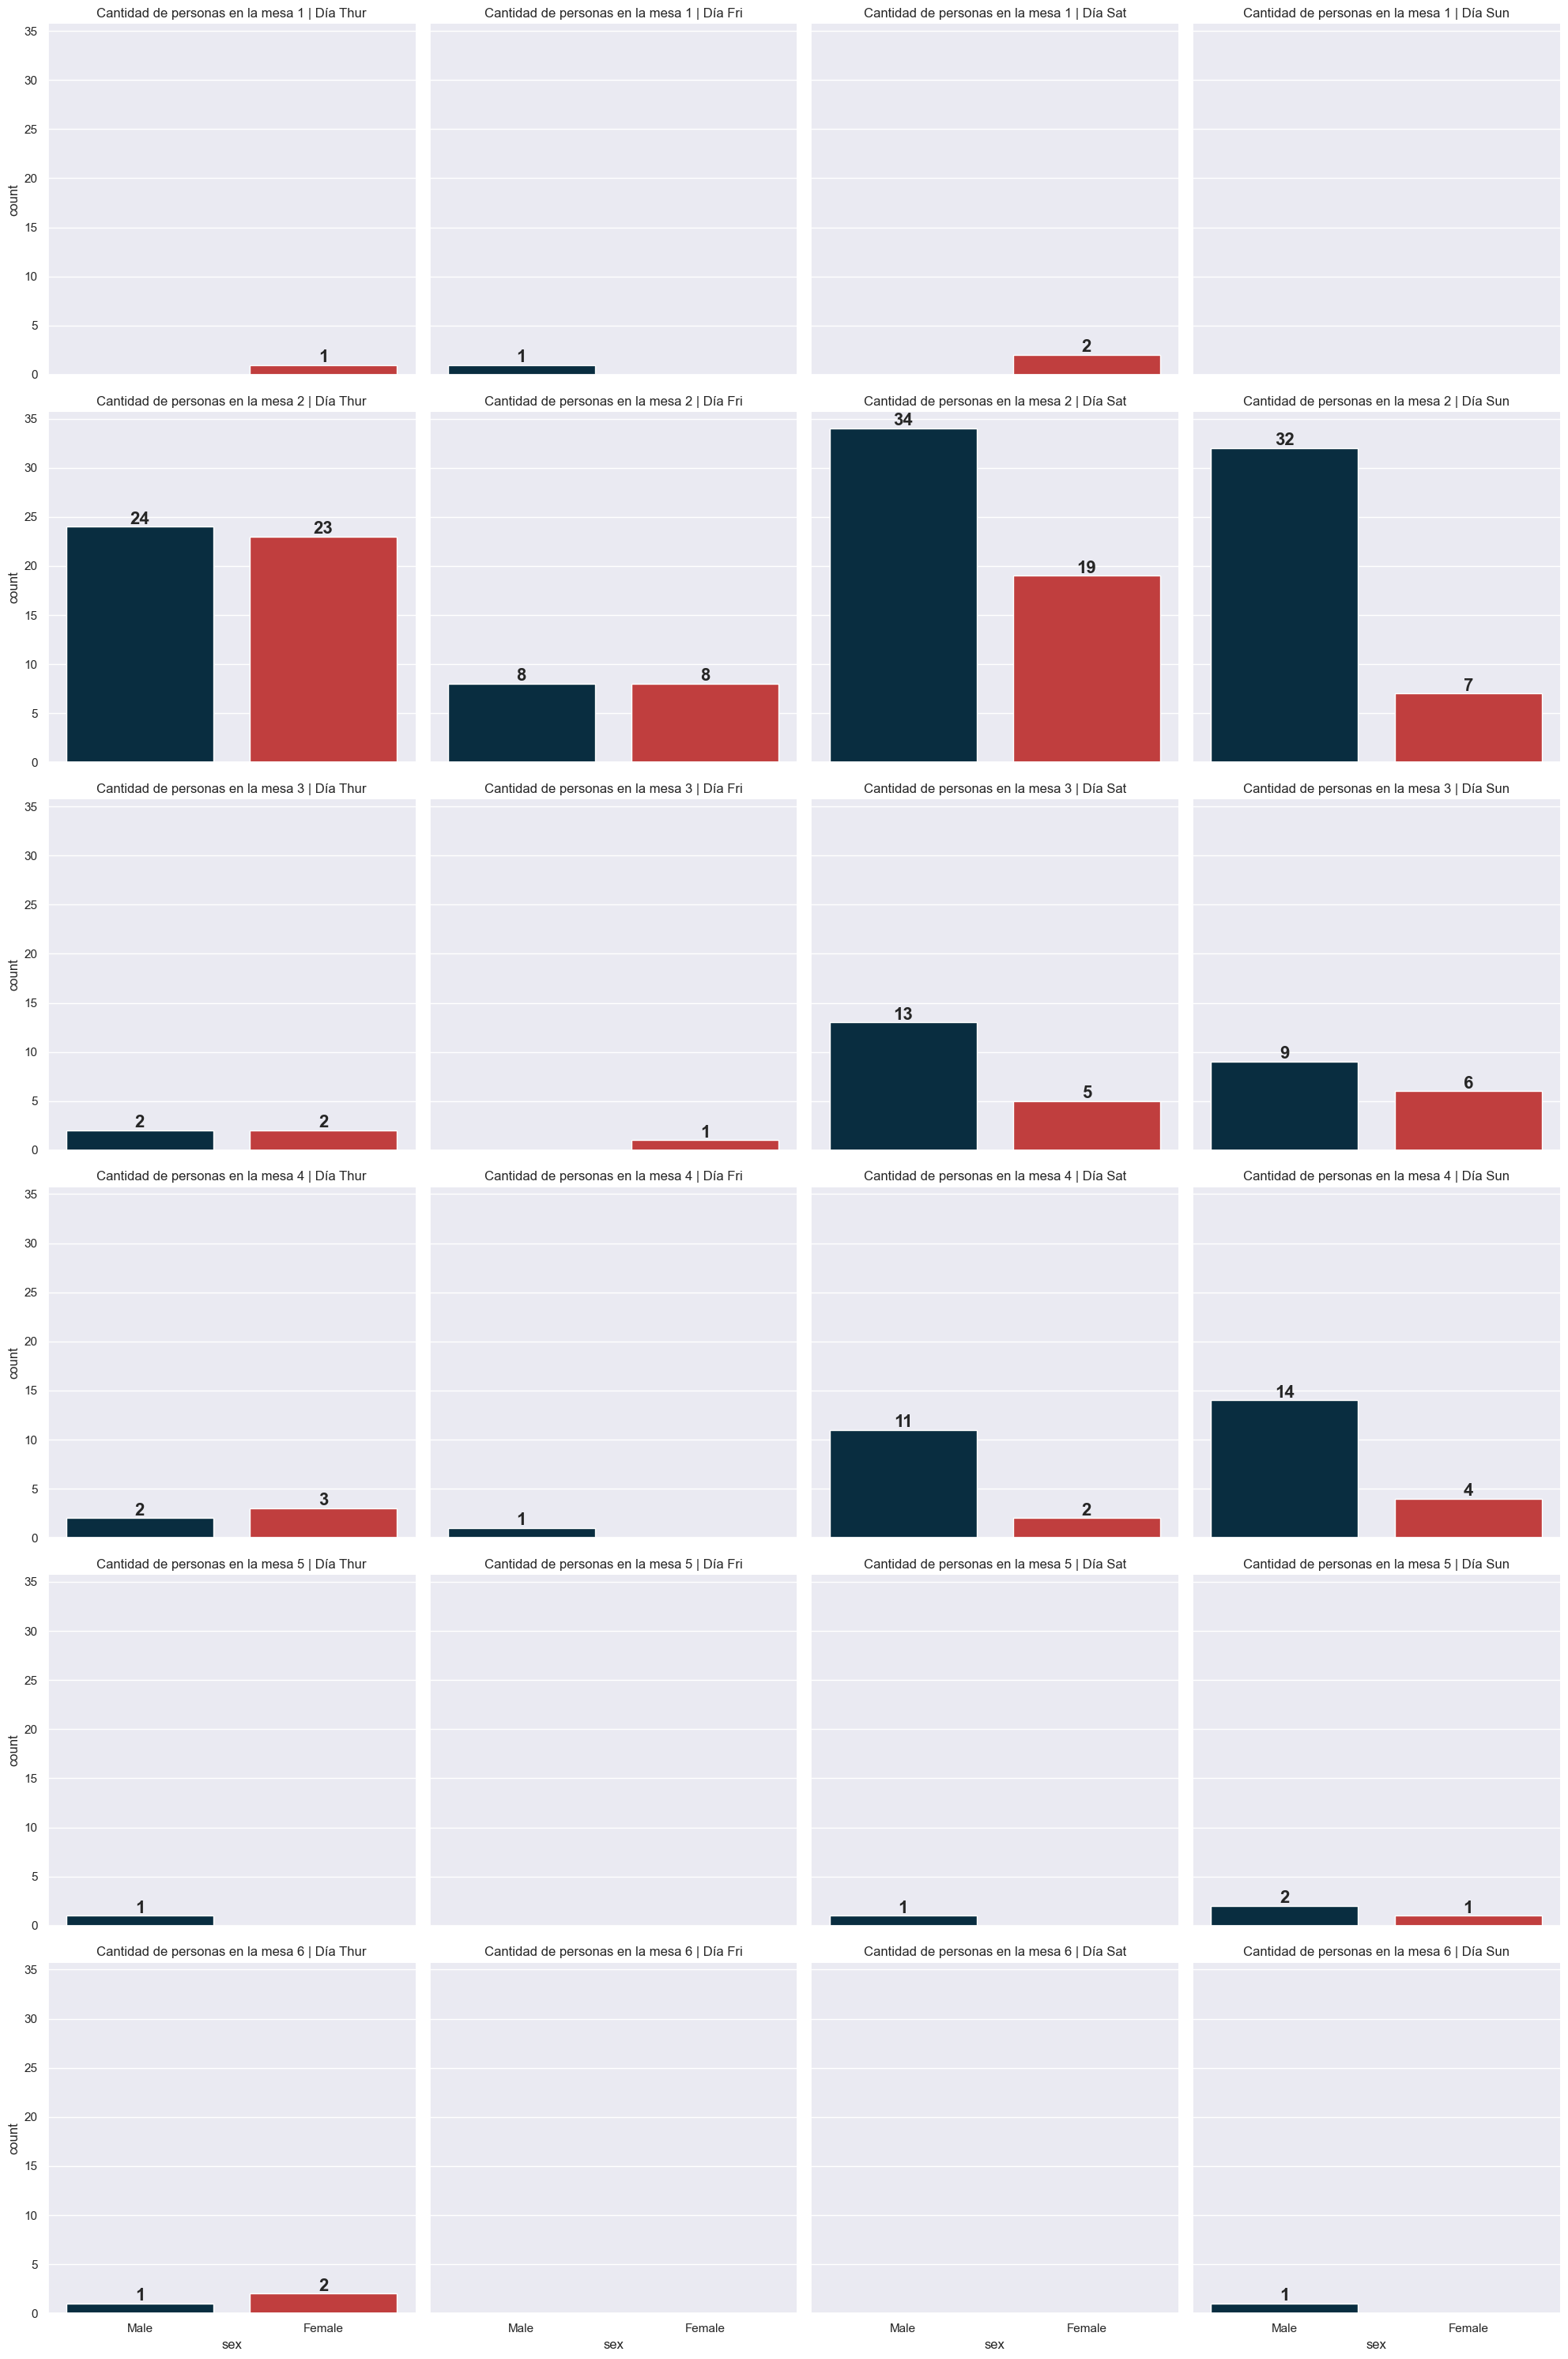

In [28]:
# Creamos la representación gráfica de la cantidad de hombres y mujeres en función del día y la cantidad de personas por mesa
# ================================================================================================

grafico = sns.catplot(data= df, 
                      x='sex', 
                      col= 'day', 
                      row= 'size', 
                      kind= 'count', 
                      palette= palette
                      )

for ax in grafico.axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., 
                     p.get_height()
                     ), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 7), 
                    textcoords='offset points', 
                    fontsize=16, 
                    weight='bold'
                    
                    )
grafico.set_titles(row_template= 'Cantidad de personas en la mesa {row_name}', col_template= 'Día {col_name}')
grafico.tight_layout()
plt.show()

De las representaciones gráficas, podemos observar lo siguiente:

- Muy pocas personas visitan el restaurante solas, independientemente del día de la semana. Del mismo modo, los grupos mayores a cuatro personas son bastante inusuales, representando solo el 5% de todos los clientes del restaurante.

- Los grupos de dos personas son los más comunes en el restaurante. Es importante destacar que los jueves y viernes se observa un número similar de hombres y mujeres en parejas. Sin embargo, durante los fines de semana, la proporción de hombres en estos grupos aumenta, superando el 60%, en comparación con el 50% observado tanto para hombres como para mujeres los jueves y viernes.

- Los jueves y viernes, es raro ver grupos que no sean de dos personas, ya que estos representan aproximadamente el 78% de los clientes que visitan el restaurante en esos días.

- Los sábados y domingos se observa la mayor afluencia de clientes, con grupos que van desde dos hasta cuatro personas. En estos grupos, es notable hay mayor cantidad de hombres que realizan el gasto en comparación con las mujeres.

- __¿Existe una diferencia en la cantidad de propina que se da dependiendo del día de la semana y si se trata de almuerzo o cena?__

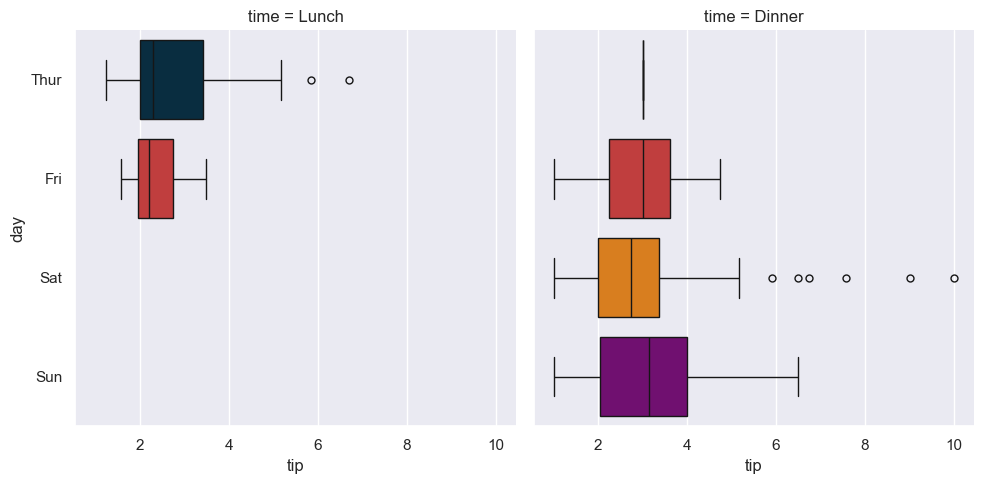

In [29]:

# Generamos la representación Gráfica
# ================================================================================================

grafico = sns.catplot(x='tip', 
                      y='day', 
                      data=df, 
                      kind='box', 
                      palette=palette, 
                      col='time'
                      )

plt.show()

De la representación gráfica de las propinas según el día de la semana y el tipo de comida (almuerzo o cena), podemos observar lo siguiente:

- **Jueves**: Las propinas son ligeramente mayores en comparación con el viernes. Además, se observa que casi todos los clientes que visitan el restaurante el jueves lo hacen para almorzar, mientras que muy pocas personas van a cenar.

- **Viernes**: La cantidad de propina es más equilibrada entre el almuerzo y la cena. Sin embargo, se percibe que las propinas son un poco más altas durante las cenas en comparación con los almuerzos.

- **Sábados y Domingos**: Hay una particularidad interesante, no se registran almuerzos durante los fines de semana. Esto podría deberse a una política del restaurante de no ofrecer almuerzos en estos días, ya que no hay ninguna observación que registre un almuerzo en el fin de semana. Sería recomendable contactar al restaurante para entender mejor las políticas o factores internos y externos que puedan explicar esta característica en el conjunto de datos. Por otro lado, se observa una gran afluencia de personas que van a cenar, y aunque la cantidad de propina disminuye ligeramente el sábado en comparación con el viernes, el domingo se registran las propinas más altas de toda la semana, donde el 50% de todas las propinas se sitúan entre los 2 y los 4 dólares.

- __¿Hay alguna diferencia entre la cantidad de propina en función del pago realizado al restaurante y el genero de la persona?__

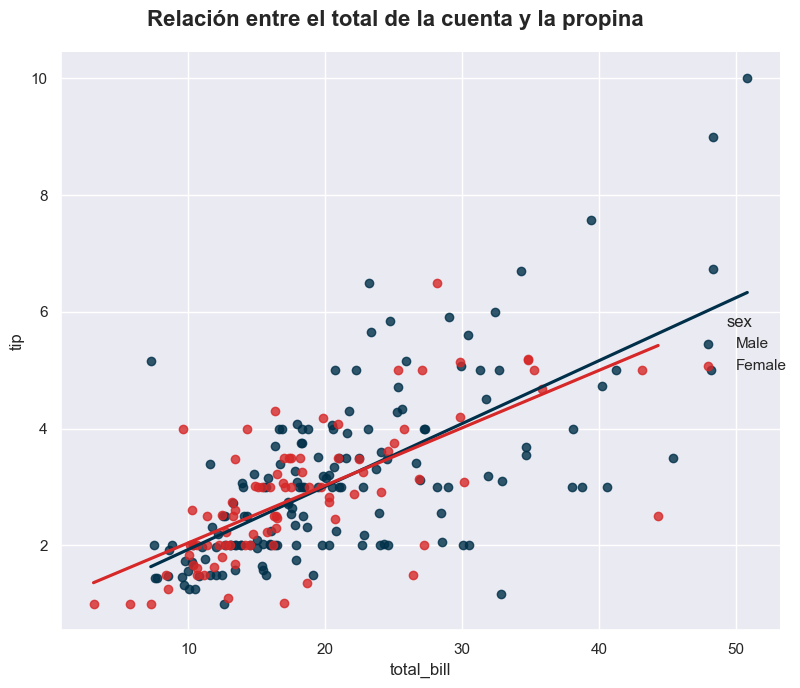

In [30]:
# Creamos un gráfico de dispersión junto con su linea de tendencia
# ================================================================================================

sns.lmplot(data= df, 
           x='total_bill', 
           y='tip', 
           hue= 'sex', 
           ci= None, 
           palette= palette, 
           height= 7
           )

plt.suptitle('Relación entre el total de la cuenta y la propina', fontsize= 16, weight= 'bold')
plt.tight_layout()

Podemos observar que la cantidad de propina tiende a aumentar en relación con la cantidad gastada en el restaurante. Además, es importante destacar que no se observa una diferencia significativa en la cantidad de propina dada por hombres y mujeres, lo que sugiere que el género no influye de manera notable en la propina dejada por los clientes.

- __¿Cómo varía la relación entre el monto total de la cuenta y la propina según el sexo del cliente y el tamaño del grupo?__

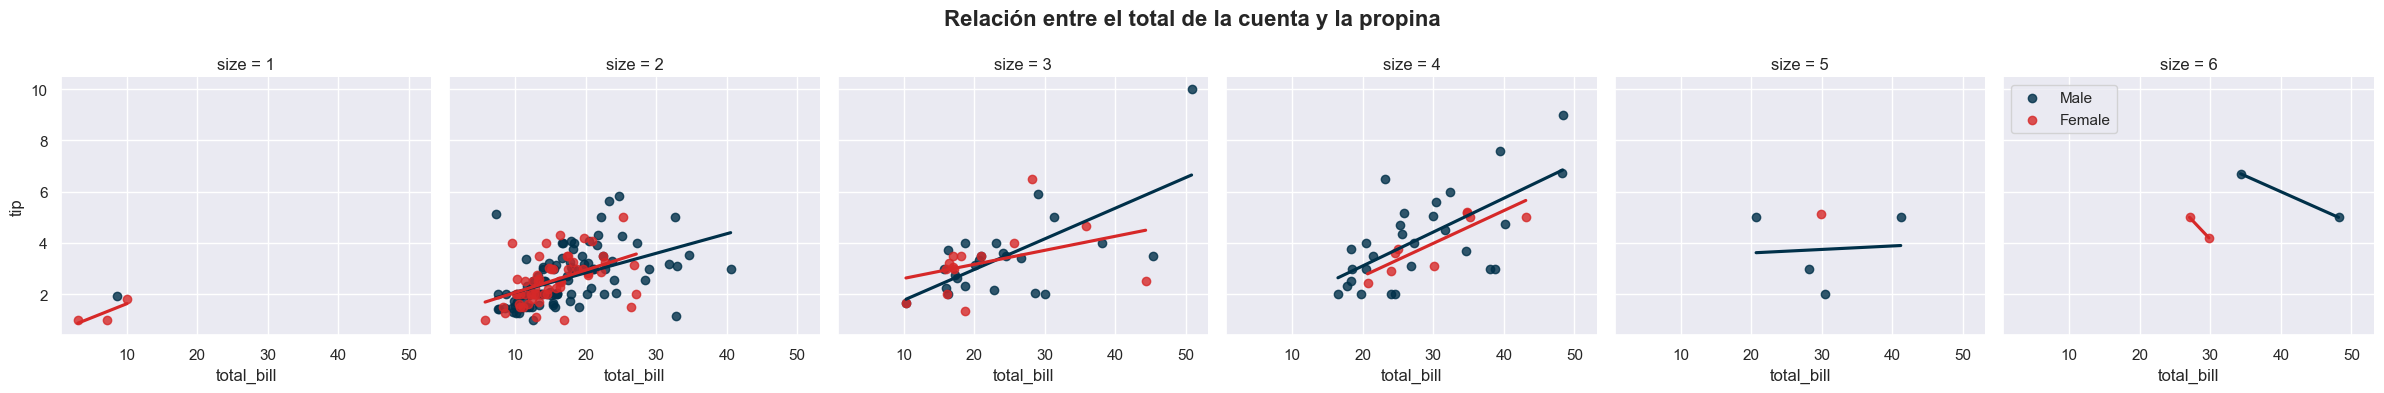

In [31]:
# Creamos gráficos de dispersión segmentado por genero y grupo de personas en la mesa
# ================================================================================================

sns.lmplot(data=df, 
           x='total_bill', 
           y='tip', 
           hue='sex', 
           col='size', 
           palette=palette, 
           ci= None, 
           height= 4, 
           legend= False
           )

plt.suptitle('Relación entre el total de la cuenta y la propina', fontsize= 16, weight= 'bold')
plt.legend(loc= 'upper left')
plt.tight_layout()

De las representaciones gráficas, podemos observar lo siguiente:

- Como solo hay cuatro observaciones correspondientes a personas que visitaron el restaurante solas, no es posible extraer una conclusión válida, ya que se necesitarían más datos para detectar una tendencia. Lo mismo ocurre con los grupos de cinco y seis personas.

- La relación positiva más fuerte se encuentra en los grupos de cuatro personas, donde se observa un aumento considerable en la cantidad de propina en función del gasto total en el restaurante. Además, en estos grupos, el gasto mínimo registrado comienza en aproximadamente 15 dólares, un monto mayor que en los grupos de menos de cuatro personas. Por otro lado, en los grupos de tres personas, se aprecia una ligera diferencia en las propinas dependiendo del género. Sin embargo, es importante considerar que en el caso de los hombres, la línea de tendencia podría estar influenciada por un pago mayor registrado en el conjunto de datos.

- En los grupos de dos personas, se observan cantidades similares de propina en función del pago, independientemente del género.

Este análisis nos permite concluir que no existe una diferencia significativa en la pendiente de la línea de regresión entre hombres y mujeres en relación con el pago y la propina, independientemente del tamaño del grupo.

## 2.8 Análisis de Correlación

A continuación, realizaremos un análisis de correlación entre las diferentes variables numéricas del conjunto de datos. Utilizaremos la correlación de Pearson para medir el grado de relación entre estas variables, y representaremos los resultados a través de un mapa de calor.

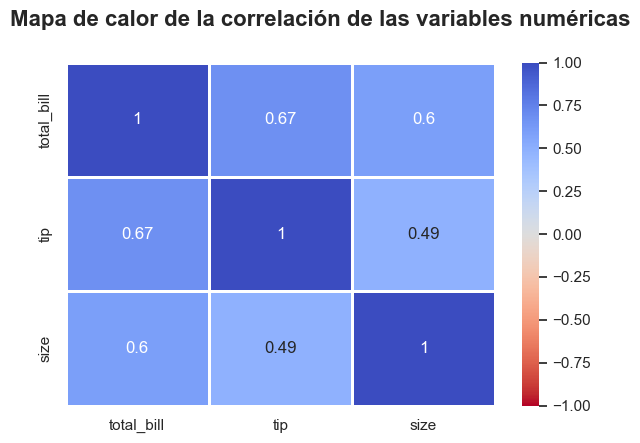

In [32]:
# Creamos un mapa de calor de la correlación de las variables numéricas
# ================================================================================================

sns.heatmap(df.corr(numeric_only= True, 
                    method= 'pearson'), 
            annot= True, 
            cmap= 'coolwarm_r', 
            linewidths= 2, 
            vmin= -1, 
            vmax= 1, 
            center= 0
            )

plt.suptitle('Mapa de calor de la correlación de las variables numéricas', fontsize= 16, weight= 'bold')
plt.tight_layout()

Como ya mencionamos anteriormente en el análisis bivariado, podemos observar que la relación positiva moderada más fuerte entre las variables se encuentra entre `tip` y `total_bill`, con una correlación de Pearson de 0.67. Esto indica que el 67% de la variabilidad en la propina puede explicarse por la cantidad gastada por el cliente. 

Además, también se observa una relación positiva moderada entre `tip` y `size`, con una correlación de 0.49. Por otro lado, existe una relación positiva moderada entre `total_bill` y `size`. La presencia de esta relación podría plantear un desafío al implementar un modelo de regresión, ya que modelos como la regresión lineal pueden enfrentar dificultades en la predicción cuando hay una correlación alta entre dos variables predictoras. Esto podría aumentar la varianza del modelo y, por lo tanto, afectar negativamente la calidad de sus predicciones.

# 3. Conclusiones

Del análisis realizado sobre el conjunto de datos podemos concluir lo siguiente:

- La mayoría de los clientes que visitan el restaurante tienden a gastar alrededor de 15 dólares, con una ligera asimetría positiva en la distribución del gasto, lo que sugiere que hay una tendencia a gastar más en algunas ocasiones. La propina promedio es de aproximadamente 3 dólares, con pocos clientes dando propinas mayores a 6 dólares. Para mejorar la experiencia del cliente y aumentar las propinas, se deben considerar estrategias para fomentar un mayor gasto puede ser beneficioso, como ofrecer promociones o menús especiales.

- La mayoría de los grupos en el restaurante son de dos personas, seguidos por grupos de tres y cuatro personas. Los grupos grandes y las visitas solitarias son bastante raras. Dado que los grupos más grandes son menos comunes, podría ser útil ajustar la disposición de las mesas para fomentar la formación de grupos más grandes, tal vez mediante la creación de áreas para grupos grandes o la promoción de eventos que atraigan a grupos numerosos.

- La distribución de clientes por género muestra una ligera predominancia de hombres, y la mayoría de los clientes son no fumadores. Esto puede influir en las estrategias de marketing y en la planificación de eventos temáticos que podrían atraer a más clientes de ambos géneros y fomentar un ambiente de no fumadores.

- El día de mayor afluencia es el sábado, seguido por el domingo. El jueves se encuentra en tercer lugar en cantidad de clientes, y el viernes es el día con la menor afluencia. Durante los fines de semana, los clientes solo visitan el restaurante para cenar, lo que podría indicar que el restaurante debería enfocarse en mejorar la experiencia de cena en estos días y considerar ofrecer promociones especiales para atraer clientes en días menos concurridos.

- La propina promedio es más alta durante la cena, especialmente durante el fin de semana. Se sugiere enfocar las promociones y campañas publicitarias para destacar la experiencia de cena, especialmente en los fines de semana, para maximizar las ventas y por ende, la cantidad de propinas.

- No se observa una diferencia significativa en las propinas basadas en el género de los clientes. Esto sugiere que el enfoque en mejorar el servicio general y la experiencia del cliente puede ser más eficaz que estrategias centradas en el género.

- El análisis de correlación muestra una relación positiva moderada entre el gasto total y la propina, así como entre el tamaño del grupo y la propina. Para aumentar las propinas, se recomienda considerar estrategias que incentiven a los clientes a gastar más, como menús con opciones de alto valor o servicios adicionales que aumenten el gasto total. Además, ajustar la disposición del restaurante para acomodar mejor a grupos más grandes puede mejorar las propinas, ya que estos tienden a dejar más en propinas.

Finalmente, se recomienda para la promoción y gestión del restaurante, enfocarse en estrategias que fomenten grupos más grandes, mejorar la experiencia de cena durante los fines de semana y realizar campañas que resalten las ventajas de gastar más en el restaurante. Además, la revisión de la disposición de las mesas y el enfoque en mejorar la experiencia de los clientes durante las horas pico pueden ayudar a maximizar tanto el gasto como las propinas de los clientes.


# Referencias Bibliográficas

- Minguillón, J. Casas, J. y Minguillón, J. (2017). Minería de datos: modelos y algoritmos. Editorial UOC.

- Garriga Trillo, A. J. (2009). Introducción al análisis de datos. UNED - Universidad Nacional de Educación a Distancia.

- Romero Villafranca, R. y Zúnica Ramajo, L. (2020). Métodos estadísticos para ingenieros. Editorial de la Universidad Politécnica de Valencia.